In [8]:
# Data collection and cleaning
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('c:\\Users\\Harshada\\Downloads\\ifood_df (1).csv')

# Handle missing 'Income' values by replacing with the mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Drop rows with outlier 'Age' (123 years old)
df = df[df['Age'] < 100]

# Create new columns for total spending and number of purchases
df['Total_Mnt_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Num_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Drop the old 'MntTotal' and 'MntRegularProds' columns as the new ones are more accurate
df = df.drop(columns=['MntTotal', 'MntRegularProds'])

# Drop the 'Z_CostContact' and 'Z_Revenue' columns as they have constant values
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [9]:
# Descriptive statistics
# Check if the DataFrame is available from the previous step
if 'df' in locals():
    print("--- Descriptive Statistics for iFood Dataset ---")

    # Select the numerical columns for descriptive statistics
    numerical_features = ['Income', 'Age', 'Recency', 'Total_Mnt_Spent', 'Total_Num_Purchases']

    # Generate descriptive statistics for the selected features
    descriptive_stats = df[numerical_features].describe().transpose()
    print(descriptive_stats)
else:
    print("Error: DataFrame not found. Please run the previous code block to load the data.")

--- Descriptive Statistics for iFood Dataset ---
                      count          mean           std     min      25%  \
Income               2205.0  51622.094785  20713.063826  1730.0  35196.0   
Age                  2205.0     51.095692     11.705801    24.0     43.0   
Recency              2205.0     49.009070     28.932111     0.0     24.0   
Total_Mnt_Spent      2205.0    606.821769    601.675284     5.0     69.0   
Total_Num_Purchases  2205.0     14.887982      7.615277     0.0      8.0   

                         50%      75%       max  
Income               51287.0  68281.0  113734.0  
Age                     50.0     61.0      80.0  
Recency                 49.0     74.0      99.0  
Total_Mnt_Spent        397.0   1047.0    2525.0  
Total_Num_Purchases     15.0     21.0      43.0  


In [10]:
#Customer segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features_for_clustering = ['Income', 'Total_Mnt_Spent', 'Total_Num_Purchases', 'Age', 'Recency', 'AcceptedCmpOverall']
X = df[features_for_clustering]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


# Based on the elbow plot from our previous analysis, we choose k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(X_scaled)
print(df['Segment'].value_counts())

c:\Users\Harshada\Downloads\ANDA GUNDU\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Harshada\Downloads\ANDA GUNDU\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Harshada\Downloads\ANDA GUNDU\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\Harshada\Downloads\ANDA GUNDU\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

Segment
2    1096
1     874
0     235
Name: count, dtype: int64


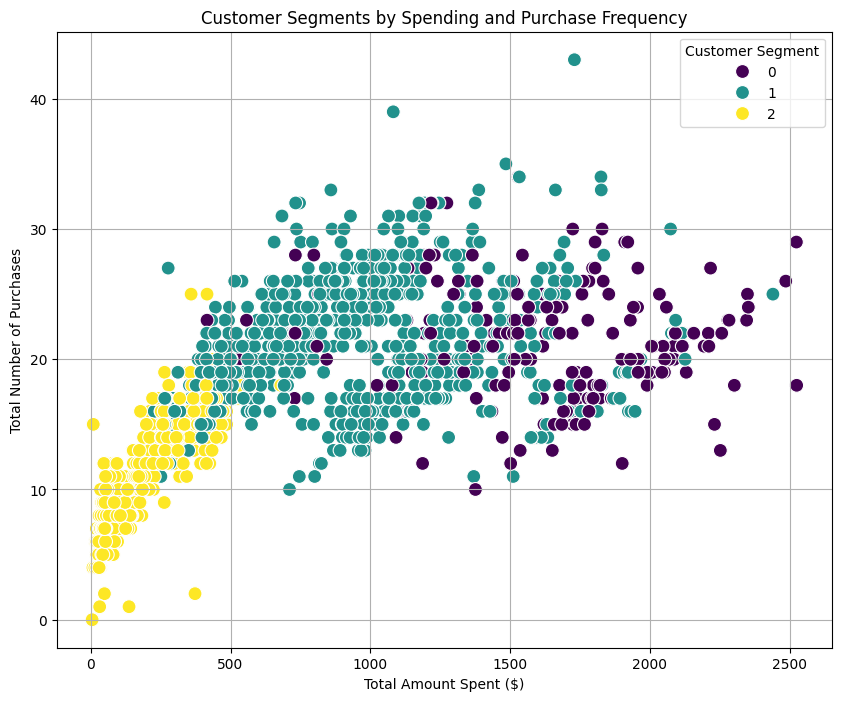

In [11]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total_Mnt_Spent', y='Total_Num_Purchases', hue='Segment', data=df, palette='viridis', s=100)
plt.title('Customer Segments by Spending and Purchase Frequency')
plt.xlabel('Total Amount Spent ($)')
plt.ylabel('Total Number of Purchases')
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()

In [12]:
# Recommendations:
#Offer discounts and loyalty programs to engage low-spending customers.

#Strengthen relationships with frequent buyers through rewards and cross-selling.

#Retain premium customers with personalized services and VIP offers.

#Provide exclusive promotions to encourage repeat purchases across all segments.

#Focus marketing strategies differently for each segment to maximize revenue.